**Importing the Libraries**

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset**

In [16]:
url = 'https://raw.githubusercontent.com/YaminiMuralidharen/MachineLearningexercises/master/teleCust1000t.csv'
df = pd.read_csv(url)

In [18]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


**Getting to know the dataset**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [25]:
df.nunique()

region       3
tenure      72
age         60
marital      2
address     50
income     218
ed           5
employ      46
retire       2
gender       2
reside       8
custcat      4
dtype: int64

In [44]:
df.region.value_counts()

region
3    344
2    334
1    322
Name: count, dtype: int64

In [46]:
df.marital.value_counts()

marital
0    505
1    495
Name: count, dtype: int64

In [48]:
df.ed.value_counts()

ed
2    287
4    234
3    209
1    204
5     66
Name: count, dtype: int64

In [50]:
df.retire.value_counts()

retire
0.0    953
1.0     47
Name: count, dtype: int64

In [52]:
df.custcat.value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

In [54]:
df.gender.value_counts()

gender
1    517
0    483
Name: count, dtype: int64

In [56]:
df.reside.value_counts()

reside
1    375
2    272
3    138
4    120
5     60
6     29
7      4
8      2
Name: count, dtype: int64

**EDA**

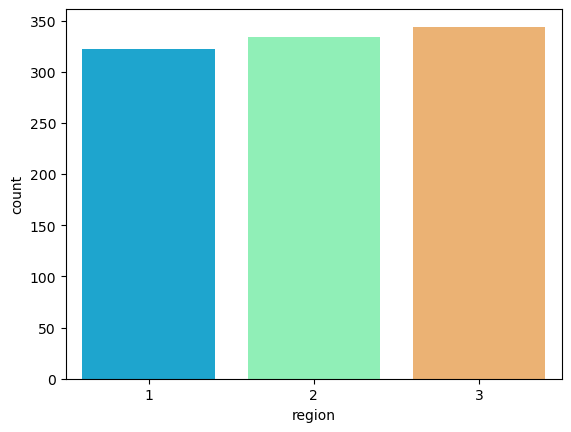

In [66]:
sns.countplot(x='region',data=df,palette='rainbow');

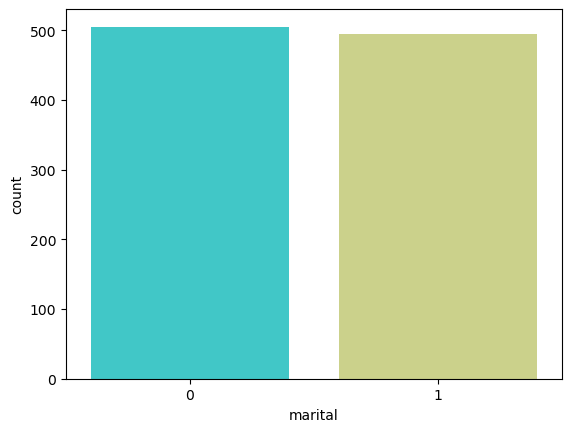

In [70]:
sns.countplot(x='marital',data=df,palette='rainbow');

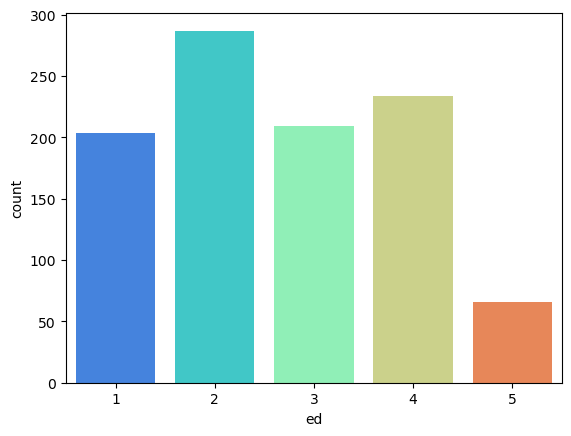

In [93]:
sns.countplot(x='ed',data=df,palette='rainbow');

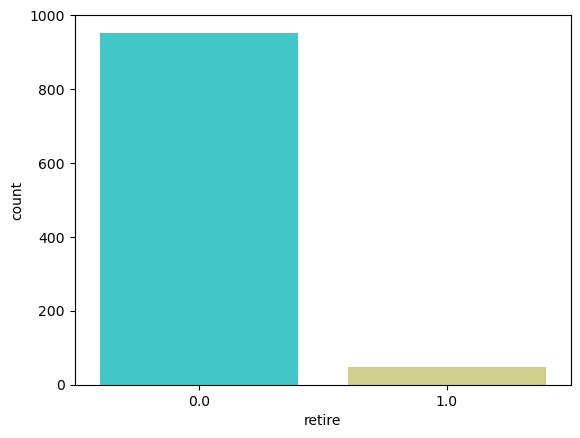

In [95]:
sns.countplot(x='retire',data=df,palette='rainbow');

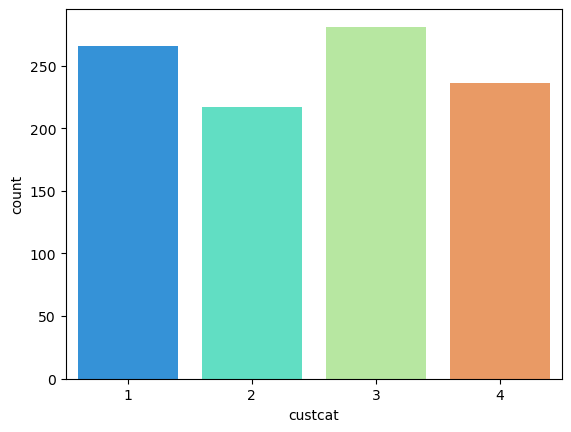

In [97]:
sns.countplot(x='custcat',data=df,palette='rainbow');

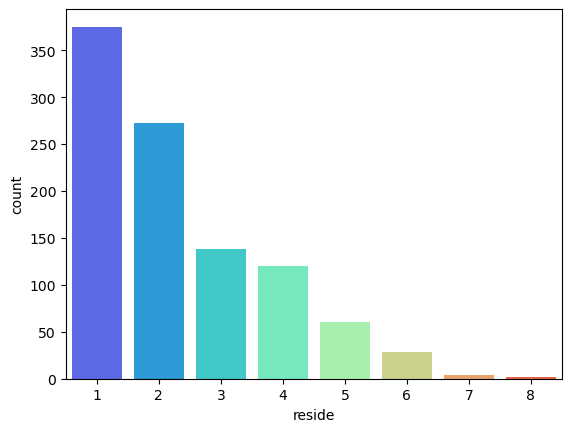

In [99]:
sns.countplot(x='reside',data=df,palette='rainbow');

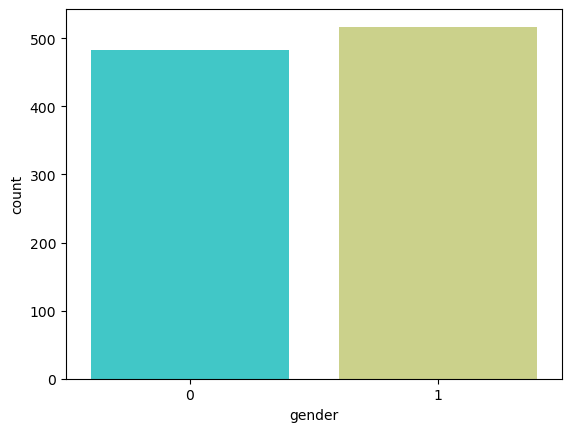

In [101]:
sns.countplot(x='gender',data=df,palette='rainbow');

In [109]:
df.drop(['retire','reside'],axis=1, inplace=True)

In [170]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,gender,custcat
0,2,13,44,1,9,64.0,4,5,0,1
1,3,11,33,1,7,136.0,5,5,0,4
2,3,68,52,1,24,116.0,1,29,1,3
3,2,33,33,0,12,33.0,2,0,1,1
4,2,23,30,1,9,30.0,1,2,0,3


In [172]:
df1= pd.get_dummies(df,columns= ['region','marital','ed','gender'],drop_first=True).copy()
df1.head()

,tenure,age,address,income,employ,custcat,region_2,region_3,marital_1,ed_2,ed_3,ed_4,ed_5,gender_1
0,13,44,9,64.0,5,1,True,False,True,False,False,True,False,False
1,11,33,7,136.0,5,4,False,True,True,False,False,False,True,False
2,68,52,24,116.0,29,3,False,True,True,False,False,False,False,True
3,33,33,12,33.0,0,1,True,False,False,True,False,False,False,True
4,23,30,9,30.0,2,3,True,False,True,False,False,False,False,False


In [210]:
X = df1.drop(['custcat'],axis=1)
y = df1['custcat']

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [218]:
X_train.head()

,tenure,age,address,income,employ,region_2,region_3,marital_1,ed_2,ed_3,ed_4,ed_5,gender_1
29,-1.055125,-0.691812,-0.253034,-0.547104,-1.090300,True,False,True,False,False,True,False,True
535,-0.211999,-0.612147,-0.253034,0.256705,-0.395652,False,True,False,False,False,True,False,True
695,1.708454,2.654125,2.524293,-0.416251,3.276060,False,False,False,False,False,False,False,True
557,-1.195646,-1.488464,-0.748986,-0.388212,-0.991064,False,False,False,True,False,False,False,False
836,1.708454,1.379482,0.044536,-0.117160,0.993644,False,False,True,False,True,False,False,True


**KNN Modelling**

In [178]:
from sklearn.preprocessing import StandardScaler

In [214]:
sc =StandardScaler()

In [220]:
X_train.iloc[:,:5] = sc.fit_transform(X_train.iloc[:,:5])
X_test.iloc[:,:5] = sc.transform(X_test.iloc[:,:5])

In [228]:
from sklearn.neighbors import KNeighborsClassifier

In [289]:
k = 2
knn_model = KNeighborsClassifier(k)
knn_model.fit(X_test,y_test)

KNeighborsClassifier(n_neighbors=2)

In [291]:
y_pred = knn_model.predict(X_test)

In [293]:
from sklearn import metrics
print("Accuracy Score:", metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.625


**Hyperparameter Optimization with Python**

In [298]:
from sklearn.model_selection import GridSearchCV

In [300]:
knn_model3 = KNeighborsClassifier()

In [312]:
knn_params = {'n_neighbors': np.arange(1,50),
              'metric':['minkowski','euclidean','manhattan'],
              'weights':['uniform','distance'],
             }

In [314]:
knn_cv_model = GridSearchCV(estimator= knn_model3, param_grid=knn_params, cv = 10)

In [316]:
knn_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [318]:
knn_cv_model.best_params_

{'metric': 'minkowski', 'n_neighbors': 42, 'weights': 'uniform'}

In [352]:
knn_tuned = KNeighborsClassifier(n_neighbors=42)

In [354]:
knn_tuned.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=42)

In [356]:
y_pred = knn_tuned.predict(X_test)

In [358]:
print("Accuracy Score:", metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.37
